In [470]:
import pandas as pd
import seaborn as sns
import numpy as np

In [471]:
df=pd.read_csv('covid_vals_raw.csv',index_col=0)

In [472]:
df.head(3)

,Life exp,Cases,Deaths,Recovered,Cases_per_1M,Deaths_per_1M,Tests,Tests_per_1M,Population,GDP 2019,Health_expenses_pc_2018,Region
Country,,,,,,,,,,,,
Switzerland,83.4,4211438,14237,4067389.0,478519,1618,22653313,2573950,8800991,715.36,8114.0,Central Europe
Spain,83.2,13488015,114858,13276258.0,288226,2454,471036328,10065601,46796640,1397.87,3576.0,PIGS
Italy,83.0,23443429,178846,22766314.0,389062,2968,252113248,4184012,60256343,2001.44,3624.0,PIGS


In [473]:
df['Death_rate']=df['Deaths']/df['Cases']
df['GDP_pc']=df['GDP 2019']/df['Population']
df['Test_pc']=df['Tests']/df['Population']

In [474]:
df['Recovery_rate']=df['Recovered']/df['Cases']

In [475]:
df.fillna(method='ffill',inplace=True)

In [476]:
df=df[(df.index!='Russia') & (df.index!='Liechtenstein')]
df=df[(df.index!='Luxembourg') & (df.index!='Serbia')]
df=df[(df.index!='Albania') & (df.index!='Belarus')]


In [477]:
df.Region.value_counts()

Central Europe    7
Balkans           6
Nordics           5
Western Europe    5
PIGS              4
Baltics           3
Eastern Europe    3
Med               1
Name: Region, dtype: int64

In [478]:
# copy the data
df_max_scaled = df.copy()
df_max_scaled=df_max_scaled[(df_max_scaled.Region=='Nordics') | 
                            (df_max_scaled.Region=='Balkans') | 
                            (df_max_scaled.Region=='Western Europe')| 
                            (df_max_scaled.Region=='PIGS') |
                           (df_max_scaled.Region=='Eastern Europe')]
df_max_scaled = df_max_scaled.drop(columns='Region')
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      

In [479]:
df_max_scaled['Region']=df['Region']

In [480]:
df_max_scaled.columns

Index(['Life exp', 'Cases', 'Deaths', 'Recovered', 'Cases_per_1M',
       'Deaths_per_1M', 'Tests', 'Tests_per_1M', 'Population', 'GDP 2019',
       'Health_expenses_pc_2018', 'Death_rate', 'GDP_pc', 'Test_pc',
       'Recovery_rate', 'Region'],
      dtype='object')

In [481]:
df_max_scaled=df_max_scaled[['Life exp', 'Deaths', 
       'Deaths_per_1M', 'Population', 'GDP_pc', 'Test_pc',
       'Recovery_rate', 'Region']]

In [482]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df_max_scaled.drop(columns='Region'))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])

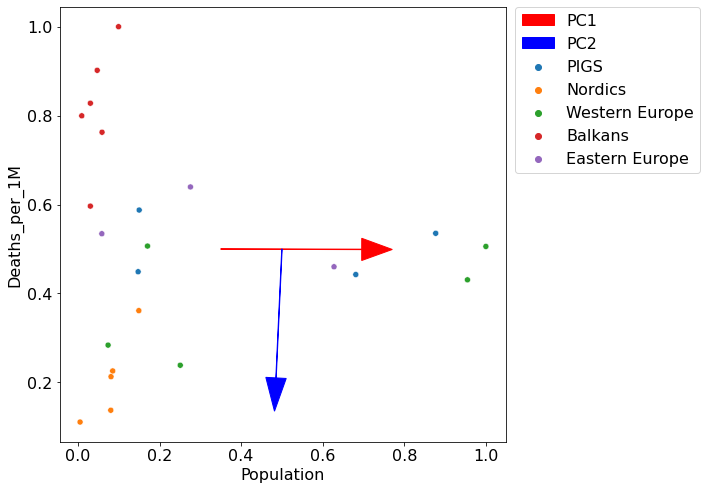

In [483]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures

sns.scatterplot(data=df_max_scaled,x='Population',y='Deaths_per_1M',hue='Region')
scale=0.5
plt.arrow(x=0.35, y=0.5, dx=pca.components_[0][1]*scale,
          dy=pca.components_[0][2]*scale,color='r',head_width=0.05,
         label='PC1')

plt.arrow(x=0.5, y=0.5, dx=pca.components_[1][1]*scale,
          dy=pca.components_[1][2]*scale,color='b',head_width=0.05,
          label='PC2')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [484]:
df_max_scaled.columns

Index(['Life exp', 'Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc', 'Recovery_rate', 'Region'],
      dtype='object')

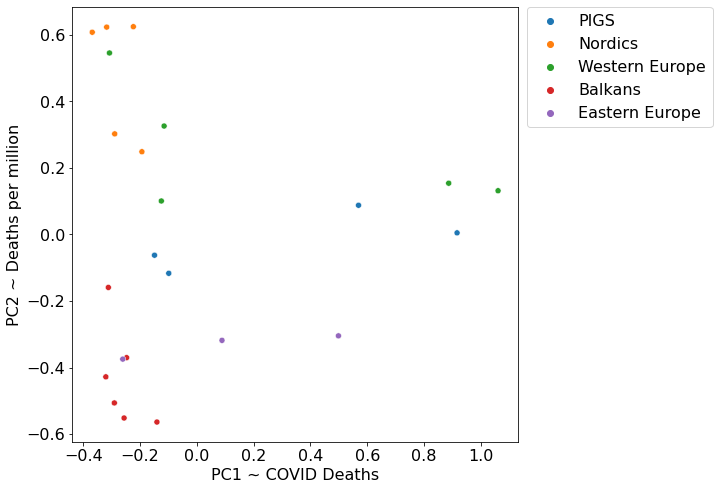

In [485]:
principalDf['Region']=df_max_scaled['Region'].values
sns.scatterplot(data=principalDf,x='PC1',y='PC2',hue='Region')
plt.xlabel('PC1 ~ COVID Deaths')
plt.ylabel('PC2 ~ Deaths per million')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

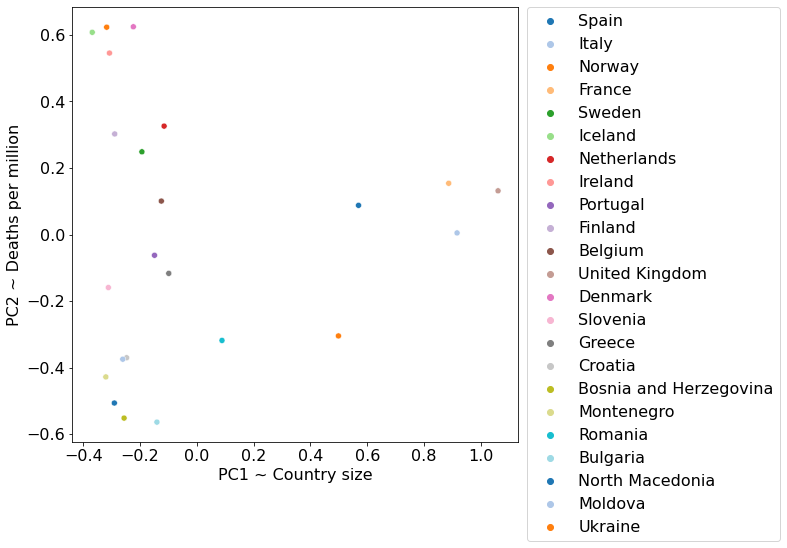

In [486]:
principalDf['Country']=df_max_scaled.index.values
sns.scatterplot(data=principalDf,x='PC1',y='PC2',hue='Country', palette='tab20')
plt.xlabel('PC1 ~ Country size')
plt.ylabel('PC2 ~ Deaths per million')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Text(0, 0.5, 'Fraction of variance explained')

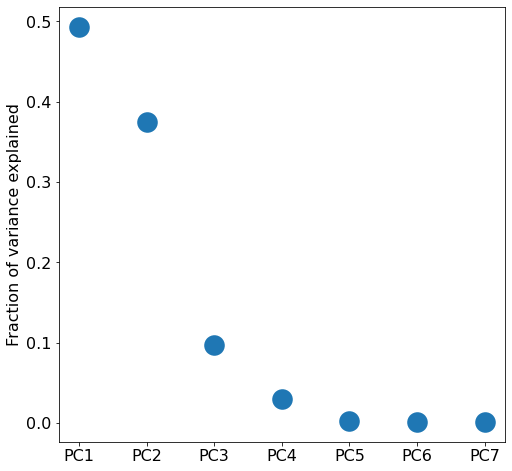

In [487]:
sns.scatterplot(x=pd.Series(pca.explained_variance_ratio_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']).index,
            y=pd.Series(pca.explained_variance_ratio_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']).values,
               s=500)
plt.ylabel('Fraction of variance explained')

#pd.Series(pca.explained_variance_ratio_,index=['PC1','PC2'])

In [488]:
loadings=pd.DataFrame(pca.components_).transpose()
loadings.columns=(['PC'+i.astype(str) for i in np.arange(len(pca.components_)+1)[1:]])
loadings.index=df_max_scaled.drop(columns=['Region']).columns.values
loadings['names']=loadings.index.values

Text(0.5, 0, '')

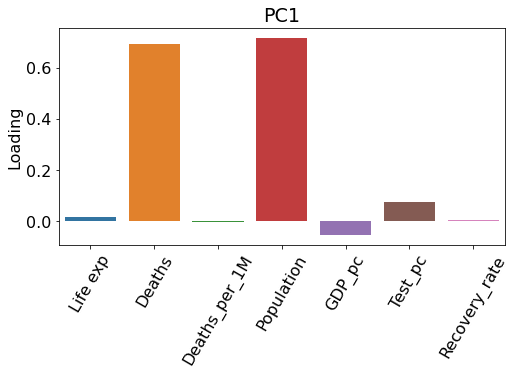

In [489]:
plt.rcParams['figure.figsize']=(8,4) #rescale figures

g=sns.barplot(data=loadings,y='PC1',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC1')
plt.ylabel('Loading')
plt.xlabel('')

Text(0.5, 0, '')

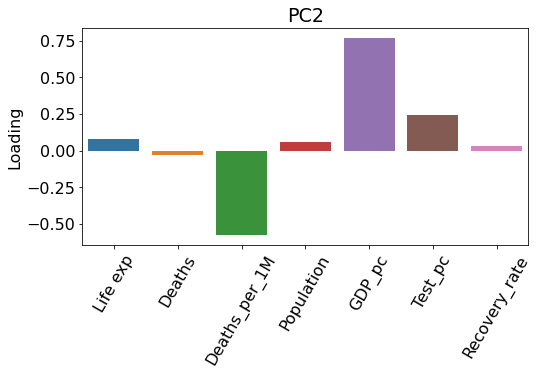

In [490]:
g=sns.barplot(data=loadings,y='PC2',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC2')
plt.ylabel('Loading')
plt.xlabel('')

Text(0.5, 0, '')

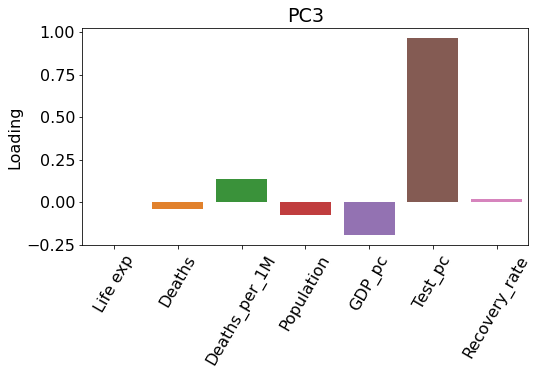

In [491]:
g=sns.barplot(data=loadings,y='PC3',x='names')
for item in g.get_xticklabels():
    item.set_rotation(60)
plt.xticks(ticks=np.arange(len(loadings)),labels=loadings.names)
plt.title('PC3')
plt.ylabel('Loading')
plt.xlabel('')

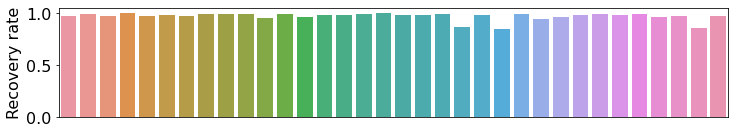

In [492]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Recovery_rate')
plt.ylabel('Recovery rate')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

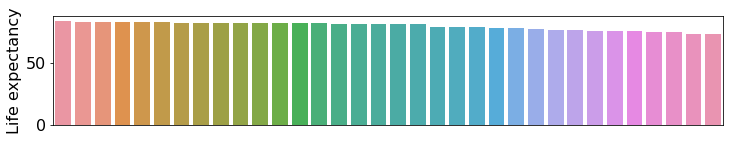

In [493]:
plt.rcParams['figure.figsize']=(12,2) #rescale figures
plt.rcParams.update({'font.size': 16})

sns.barplot(data=df,x=df.index,y='Life exp')
plt.ylabel('Life expectancy')
plt.xlabel('')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.rcParams['figure.figsize']=(12,4) #rescale figures
#plt.ylim([0,8000])

In [494]:
# copy the data
df_max_scaled = df.copy()
df_max_scaled=df_max_scaled[(df_max_scaled.Region=='Nordics') | 
                            (df_max_scaled.Region=='Balkans') | 
                            (df_max_scaled.Region=='Western Europe')| 
                            (df_max_scaled.Region=='PIGS') |
                           (df_max_scaled.Region=='Eastern Europe')]
df_max_scaled = df_max_scaled.drop(columns='Region')
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      

In [495]:
df_max_scaled['Region']=df['Region']

In [496]:
df_max_scaled=df_max_scaled[['Life exp', 'Deaths', 
       'Deaths_per_1M', 'Population', 'GDP_pc', 'Test_pc',
       'Recovery_rate', 'Region']]

In [497]:
df_max_scaled.columns

Index(['Life exp', 'Deaths', 'Deaths_per_1M', 'Population', 'GDP_pc',
       'Test_pc', 'Recovery_rate', 'Region'],
      dtype='object')

In [498]:
#df_max_scaled=df_max_scaled[['Life exp', 'Deaths', 
#       'Deaths_per_1M', 'Population', 'GDP_pc', 'Test_pc',
#       'Recovery_rate', 'Region']]

In [499]:
df_max_scaled.Region=df_max_scaled.Region.astype('category')
df_max_scaled.Region=df_max_scaled.Region.cat.reorder_categories(['Balkans','Eastern Europe','Nordics','Western Europe','PIGS'])

In [500]:
df_max_scaled['CName']=df_max_scaled.index.values

In [501]:
df_max_scaled.sort_values('Region').CName.values

array(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 'Ukraine',
       'Romania', 'Moldova', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'United Kingdom', 'Belgium', 'Ireland', 'Netherlands',
       'France', 'Portugal', 'Italy', 'Greece', 'Spain'], dtype=object)

In [502]:
df_max_scaled.CName=df_max_scaled.CName.astype('category')
df_max_scaled.CName=df_max_scaled.CName.cat.reorder_categories(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 'Ukraine',
       'Romania', 'Moldova', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'Belgium', 'Ireland', 'Netherlands','United Kingdom',
       'France', 'Italy', 'Spain', 'Portugal', 'Greece'])

In [503]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(df_max_scaled.sort_values('CName').drop(columns=['Region','CName']), 22, mode='distance', metric='minkowski',p=1).todense()

In [504]:
len(df_max_scaled)

23

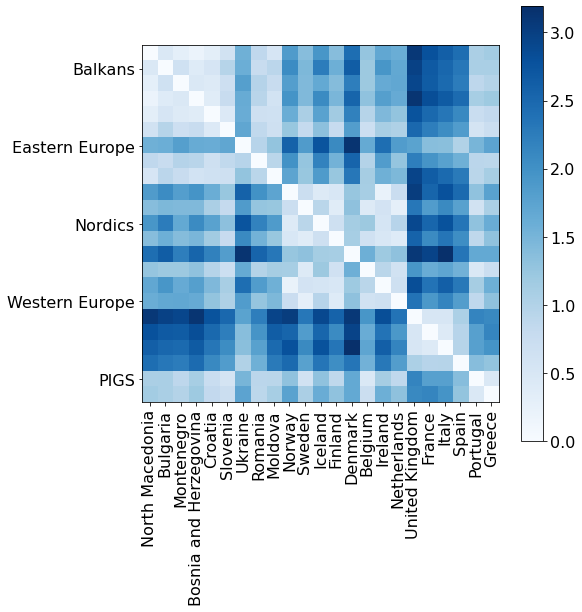

In [505]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures

plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::5],labels=df_max_scaled.sort_values('CName').Region.values[1::5]);
plt.xticks(ticks=np.arange(A.shape[0]),labels=df_max_scaled.sort_values('CName').index.values,rotation=90);

#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);

In [506]:
principalDf.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Region,Country
0,0.569386,0.087682,0.217017,0.051752,-0.041508,-0.004922,-0.018523,PIGS,Spain
1,0.916545,0.004854,-0.066265,-0.068792,0.046722,-0.031978,-0.019646,PIGS,Italy


In [507]:
principalDf.Region=principalDf.Region.astype('category')
principalDf.Region=principalDf.Region.cat.reorder_categories(['Balkans','Eastern Europe','Nordics','Western Europe','PIGS'])

In [508]:
principalDf.sort_values('Region').Country.values

array(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 'Ukraine',
       'Romania', 'Moldova', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'United Kingdom', 'Belgium', 'Ireland', 'Netherlands',
       'France', 'Portugal', 'Italy', 'Greece', 'Spain'], dtype=object)

In [509]:
principalDf.Country=principalDf.Country.astype('category')
principalDf.Country=principalDf.Country.cat.reorder_categories(['North Macedonia', 'Bulgaria', 'Montenegro',
       'Bosnia and Herzegovina', 'Croatia', 'Slovenia', 'Ukraine',
       'Romania', 'Moldova', 'Norway', 'Sweden', 'Iceland', 'Finland',
       'Denmark', 'Belgium', 'Ireland', 'Netherlands','United Kingdom',
       'France', 'Italy', 'Spain', 'Portugal', 'Greece'])

In [510]:
from sklearn.neighbors import kneighbors_graph
#A=kneighbors_graph(df[['Casablanca','Cape Town']], 20, mode='distance', metric='euclidean').todense()
A=kneighbors_graph(principalDf.sort_values('Country').drop(columns=['Region','Country','PC4','PC5','PC6','PC7']), 22, mode='distance', metric='euclidean').todense()

In [511]:
len(df_max_scaled)

23

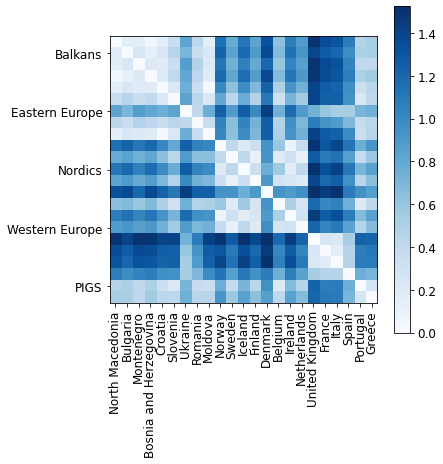

In [514]:
plt.rcParams.update({'font.size': 12})

plt.rcParams['figure.figsize']=(6,6) #rescale figures

plt.imshow(A,cmap='Blues')
plt.colorbar()
plt.yticks(ticks=np.arange(A.shape[0])[1::5],labels=principalDf.sort_values('Country').Region.values[1::5]);
plt.xticks(ticks=np.arange(A.shape[0]),labels=principalDf.sort_values('Country').Country.values,rotation=90);

#plt.yticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman']);#df.index.values);
#plt.xticks(ticks=np.arange(A.shape[0])[1::3],labels=['Senegal','Lybia','Egypt','Mozambique','Kenya','DRC','Oman'],rotation=45);#,labels=df.index.values,rotation=90);